In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import torchvision.models as models
from torchvision import datasets, transforms as T

In [2]:
epsilons = [0, .05, .1, .15, .2, .25, .3]
#epsilons = [0, .01, .05, .1]
use_cuda=True

In [3]:
import os
base = "/content/drive/MyDrive/CS726/inv2-tops/"
for f in os.listdir(base):
    if f != "PaxHeader":
        print(f)
        #os.rename(os.path.join(base,f),os.path.join(base,f.zfill(4)))

0994
0999
0993
0998
0995
0996
0992
0997
0991
0982
0099
0989
0987
0985
0984
0986
0990
0983
0988
0976
0973
0979
0974
0977
0098
0980
0981
0975
0978
0968
0967
0097
0970
0965
0972
0969
0966
0964
0971
0958
0963
0955
0959
0957
0962
0096
0956
0961
0960
0095
0952
0948
0951
0953
0946
0947
0949
0954
0950
0945
0940
0941
0944
0938
0942
0939
0943
0937
0094
0932
0930
0933
0929
0935
0931
0934
0928
0093
0936
0923
0927
0926
0925
0921
0922
0920
0924
0092
0919
0912
0916
0913
0915
0914
0917
0918
0910
0911
0091
0900
0902
0909
0901
0906
0907
0905
0904
0903
0908
0895
0090
0894
0009
0897
0893
0898
0892
0896
0899
0888
0887
0885
0883
0886
0884
0890
0891
0889
0089
0878
0088
0882
0879
0877
0875
0874
0880
0881
0876
0087
0871
0868
0870
0865
0867
0869
0873
0872
0866
0861
0859
0860
0862
0086
0856
0857
0863
0858
0864
0852
0085
0854
0853
0847
0855
0849
0851
0850
0848
0084
0840
0843
0839
0838
0842
0846
0844
0845
0841
0083
0831
0830
0837
0836
0829
0833
0834
0835
0832
0082
0827
0823
0820
0825
0828
0824
0826
0821
0822
0818


In [18]:
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])


transform = T.Compose([T.Resize(256), T.CenterCrop(224), T.ToTensor(), normalize])

dataset = datasets.ImageFolder("/content/drive/MyDrive/CS726/inv2-tops/", transform=transform)
test_loader = torch.utils.data.DataLoader(dataset,batch_size=1, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[-1.4329, -1.4500, -1.3130,  ..., -1.9467, -1.9638, -1.9467],
         [-1.6042, -1.5699, -1.0048,  ..., -1.2274, -1.4672, -1.5528],
         [-1.7925, -1.7069, -0.7993,  ..., -0.3369, -0.4397, -0.4226],
         ...,
         [ 1.2899,  1.2899,  1.2557,  ...,  1.0331,  0.9474,  0.9303],
         [ 1.1358,  1.1358,  1.1015,  ...,  1.1358,  1.0502,  0.9988],
         [ 1.0673,  1.0673,  0.9988,  ...,  1.2385,  1.1700,  1.1187]],

        [[-1.5105, -1.4755, -1.4405,  ..., -1.7731, -1.8256, -1.8256],
         [-1.6155, -1.5805, -1.1954,  ..., -1.1429, -1.3880, -1.4230],
         [-1.7906, -1.6681, -1.2304,  ..., -0.3901, -0.4776, -0.4426],
         ...,
         [ 1.2381,  1.2206,  1.1856,  ...,  0.9055,  0.8179,  0.8004],
         [ 1.0630,  1.0630,  1.0105,  ...,  1.0105,  0.9230,  0.8704],
         [ 0.9580,  0.9580,  0.9055,  ...,  1.1506,  1.0805,  1.0105]],

        [[-1.3687, -1.3513, -1.3861,  ..., -1.6127, -1.6476, -1.6650],
         [-1.4559, -1.3861, -1.1944,  ..., -1

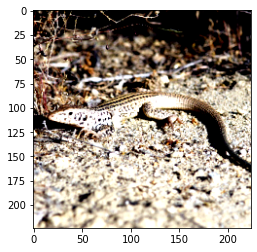

In [19]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(test_loader)
images, labels = dataiter.next()

#print image
print(images[0])
imshow(images[0])

In [20]:
# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Load the network
model = models.alexnet(pretrained=True)

# Transfer the network
model = model.to(device)

# Set the model in evaluation mode. In this case this is for the Dropout layers
model.eval()

CUDA Available:  True


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [21]:
# FGSM attack code
def fgsm_attack(image, epsilon, data_grad):
    # Collect the element-wise sign of the data gradient
    sign_data_grad = data_grad.sign()
    # Create the perturbed image by adjusting each pixel of the input image
    perturbed_image = image + epsilon*sign_data_grad
    # Adding clipping to maintain [0,1] range
    # perturbed_image = torch.clamp(perturbed_image, 0, 1)
    # Return the perturbed image
    return perturbed_image

In [22]:
def test( model, device, test_loader, epsilon ):

    # Accuracy counter
    correct = 0
    adv_examples = []
    counter = 0
    # Loop over all examples in test set
    for data, target in test_loader:
        #print(data)
        # Check for 1000 images
        counter += 1
        if counter == 1000:
          break

        # Send the data and label to the device
        data, target = data.to(device), target.to(device)

        # Set requires_grad attribute of tensor. Important for Attack
        data.requires_grad = True

        # Forward pass the data through the model
        output = model(data)
        init_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability

        # If the initial prediction is wrong, dont bother attacking, just move on
        if init_pred.item() != target.item():
            continue

        # Calculate the loss
        loss = F.nll_loss(output, target)

        # Zero all existing gradients
        model.zero_grad()

        # Calculate gradients of model in backward pass
        loss.backward()

        # Collect datagrad
        data_grad = data.grad.data

        # Call FGSM Attack
        perturbed_data = fgsm_attack(data, epsilon, data_grad)

        # Re-classify the perturbed image
        output = model(perturbed_data)

        # Check for success
        final_pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        if final_pred.item() == target.item():
            correct += 1
            # Special case for saving 0 epsilon examples
            if (epsilon == 0) and (len(adv_examples) < 5):
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )
        else:
            # Save some adv examples for visualization later
            if len(adv_examples) < 5:
                adv_ex = perturbed_data.squeeze().detach().cpu().numpy()
                adv_examples.append( (init_pred.item(), final_pred.item(), adv_ex) )

    # Calculate final accuracy for this epsilon
    #final_acc = correct/float(len(test_loader))
    final_acc = correct/float(1000)
    #print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, len(test_loader), final_acc))
    print("Epsilon: {}\tTest Accuracy = {} / {} = {}".format(epsilon, correct, 1000, final_acc))

    # Return the accuracy and an adversarial example
    return final_acc, adv_examples

In [23]:
accuracies = []
examples = []

# Run test for each epsilon
for eps in epsilons:
    acc, ex = test(model, device, test_loader, eps)
    accuracies.append(acc)
    examples.append(ex)

Epsilon: 0	Test Accuracy = 584 / 1000 = 0.584
Epsilon: 0.05	Test Accuracy = 35 / 1000 = 0.035
Epsilon: 0.1	Test Accuracy = 8 / 1000 = 0.008
Epsilon: 0.15	Test Accuracy = 5 / 1000 = 0.005
Epsilon: 0.2	Test Accuracy = 2 / 1000 = 0.002
Epsilon: 0.25	Test Accuracy = 3 / 1000 = 0.003
Epsilon: 0.3	Test Accuracy = 2 / 1000 = 0.002


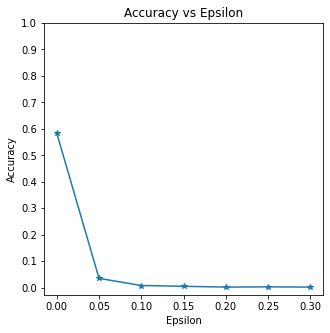

In [24]:
plt.figure(figsize=(5,5))
plt.plot(epsilons, accuracies, "*-")
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xticks(np.arange(0, .35, step=0.05))
plt.title("Accuracy vs Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.show()